# TASK 3

#### To Explore Decision Tree Algorithm

##### Importing libraries

In [14]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder




###### Loading Data 

In [21]:
df=pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [27]:
target=df['Species']
df1=df.copy()
df1=df1.drop('Species',axis=1)
df1.shape

(150, 4)

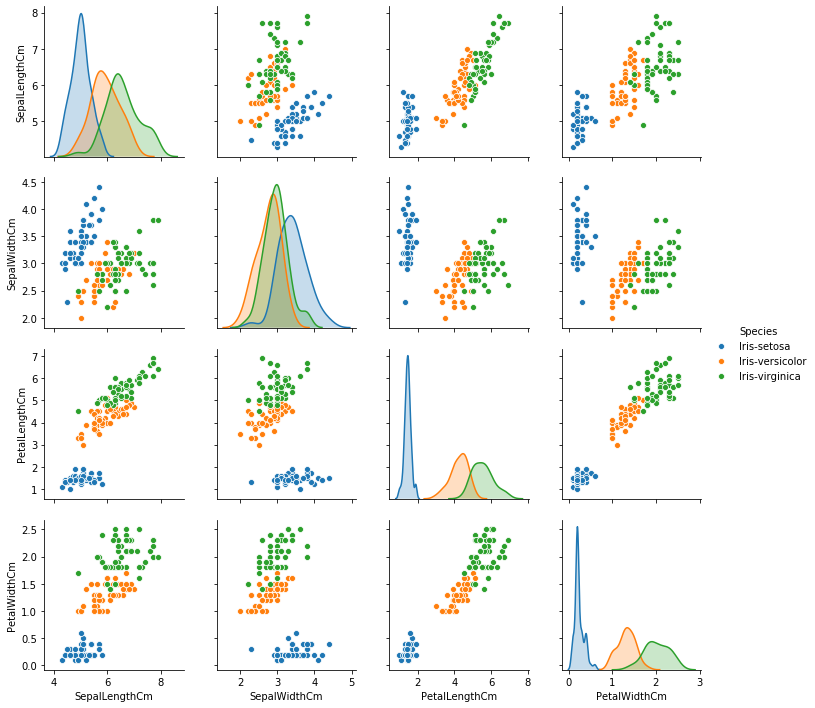

In [28]:
sns.pairplot(df,hue='Species')

###### Observation : Iris-Setosa makes a distinctive cluster in every parameter,while the otherv two species are overlapping a bit 
    on each other.
    

### DECISION TREE ALGORITHM

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [31]:
# Defining the attributes and labels   
x=df.iloc[:,[0,1,2,3]].values   # Attributes
le= LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
y=df['Species'].values  # Labels
print('The Shape of the Data is - ',df.shape)

The Shape of the Data is -  (150, 5)


In [32]:
# splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('Training split - ',x_train.shape)
print('Testing split - ',x_test.shape)

Training split -  (120, 4)
Testing split -  (30, 4)


In [34]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Decision Tree Classifier created !')

Decision Tree Classifier created !


###### Installing libraries for graphviz

In [35]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [39]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,feature_names=df1.columns,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

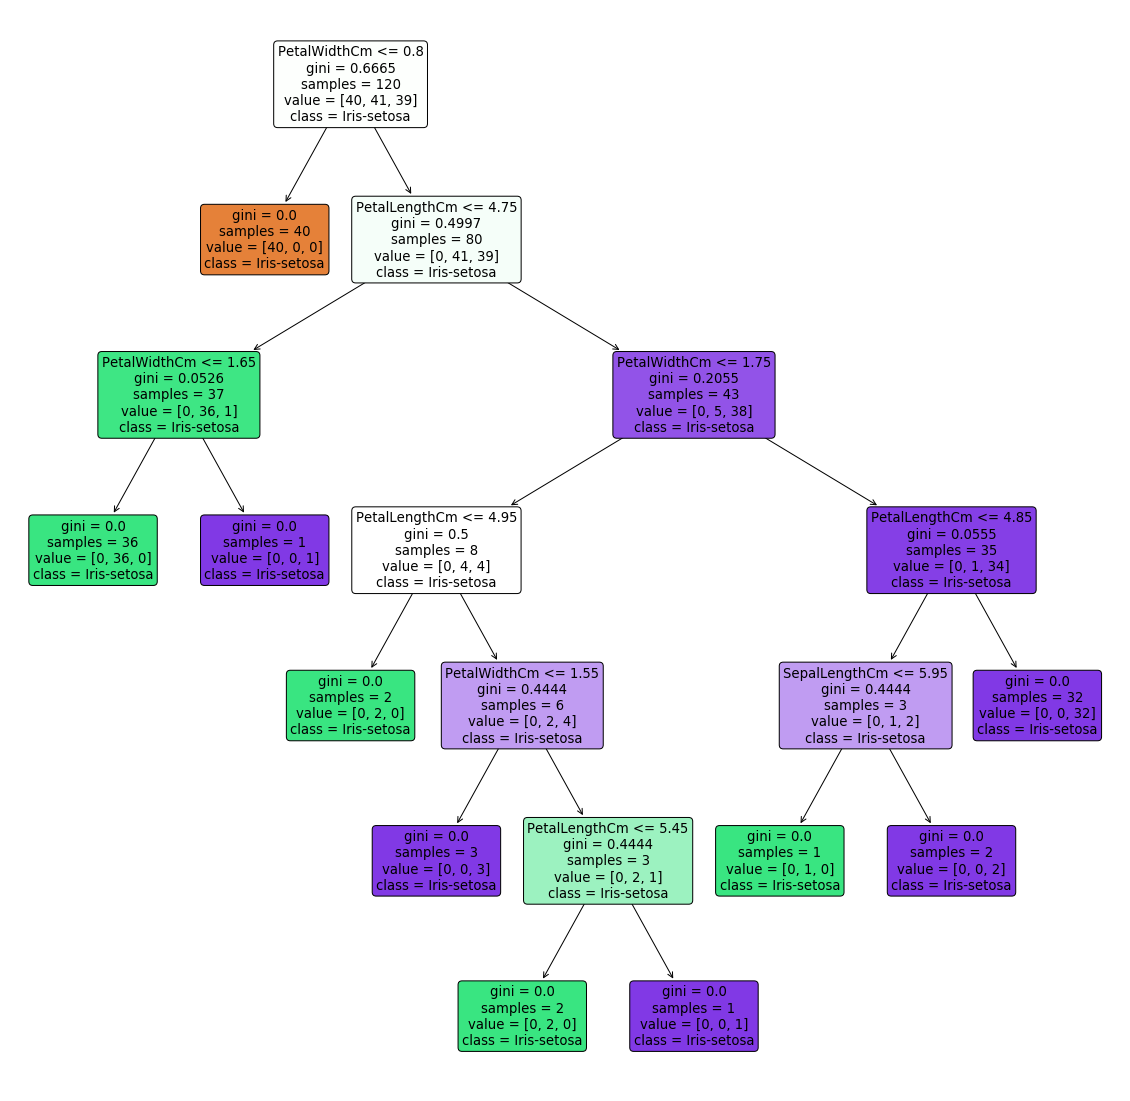

In [42]:
# visualising without the use of graphviz
plt.figure(figsize=(20,20))
dtree=plot_tree(model,feature_names=df1.columns,class_names=target.values,filled=True,precision=4,rounded=True)